# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

# 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [28]:
import pandas as pd
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [3]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [4]:
## load dataset here
df = pd.read_csv("/kaggle/input/fer-dataset/icml_face_data.csv")
df

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


## Data Analysis

6


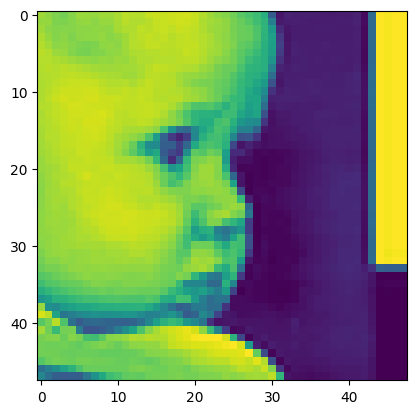

In [5]:
id = 12
image = np.reshape(np.array(df.pixels[id].split()).astype(int),(48,48))
plt.imshow(image)
print(df.emotion[id])

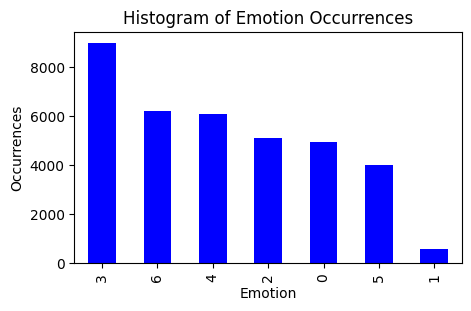

In [6]:
plt.figure(figsize=(5, 3))
emotion_counts = df["emotion"].value_counts()
emotion_counts.plot(kind='bar', color='blue')
plt.title('Histogram of Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Occurrences')
plt.show()

The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [7]:
images, labels = parse_data(df)

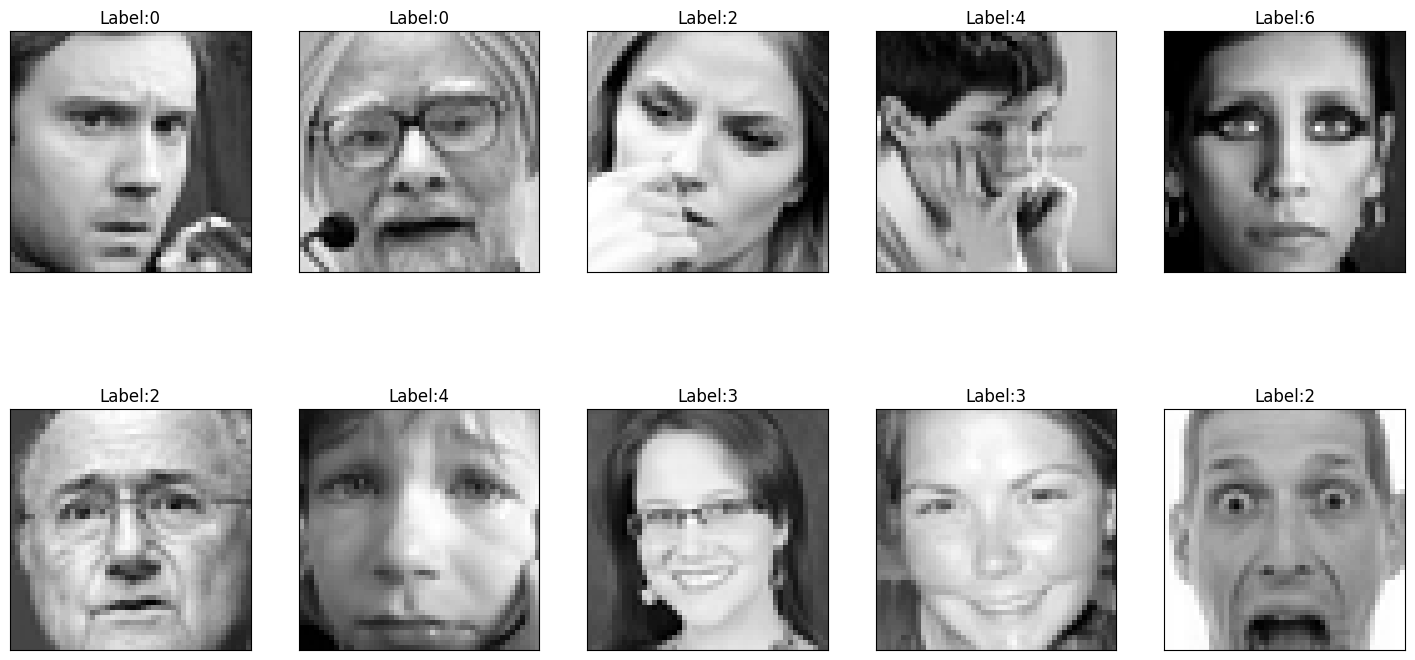

In [8]:
## showing images here
show_img(images, labels)

In [9]:
m = df.groupby('emotion').count().mean().values[0]
print("Mean of all emotion counts: " + str(m))

Mean of all emotion counts: 5126.714285714285


## Data Processing

In [10]:
oversampled = pd.DataFrame()
for emotion in range(0,7):
    print(emotion)
    l = len(df[df.emotion == emotion])
    print('Before sampling: ' + str(l))
    
    if l >= m:
        dft = df[df.emotion == emotion].sample(int(m))
        oversampled = pd.concat([oversampled, dft])
        print('After sampling: ' + str(len(dft)))
    else:
        frac = int(m / l)
        dft = pd.DataFrame()
        for i in range(frac + 1):
            dft = pd.concat([dft, df[df.emotion == emotion]])
        dft = dft.sample(int(m))
        oversampled = pd.concat([oversampled, dft])
        print('After sampling: ' + str(len(dft)))
        
df = oversampled.sample(frac=1).reset_index(drop=True)


0
Before sampling: 4953
After sampling: 5126
1
Before sampling: 547
After sampling: 5126
2
Before sampling: 5121
After sampling: 5126
3
Before sampling: 8989
After sampling: 5126
4
Before sampling: 6077
After sampling: 5126
5
Before sampling: 4002
After sampling: 5126
6
Before sampling: 6198
After sampling: 5126


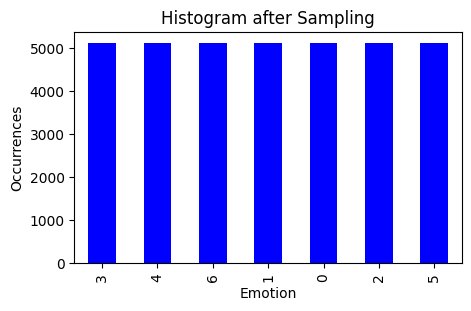

In [11]:
plt.figure(figsize=(5, 3))
emotion_counts = df["emotion"].value_counts()
emotion_counts.plot(kind='bar', color='blue')
plt.title('Histogram after Sampling')
plt.xlabel('Emotion')
plt.ylabel('Occurrences')
plt.show()

# 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [12]:
from sklearn.decomposition import PCA
images = images.reshape(images.shape[0], -1)
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(images)
pca

PCA(n_components=2)

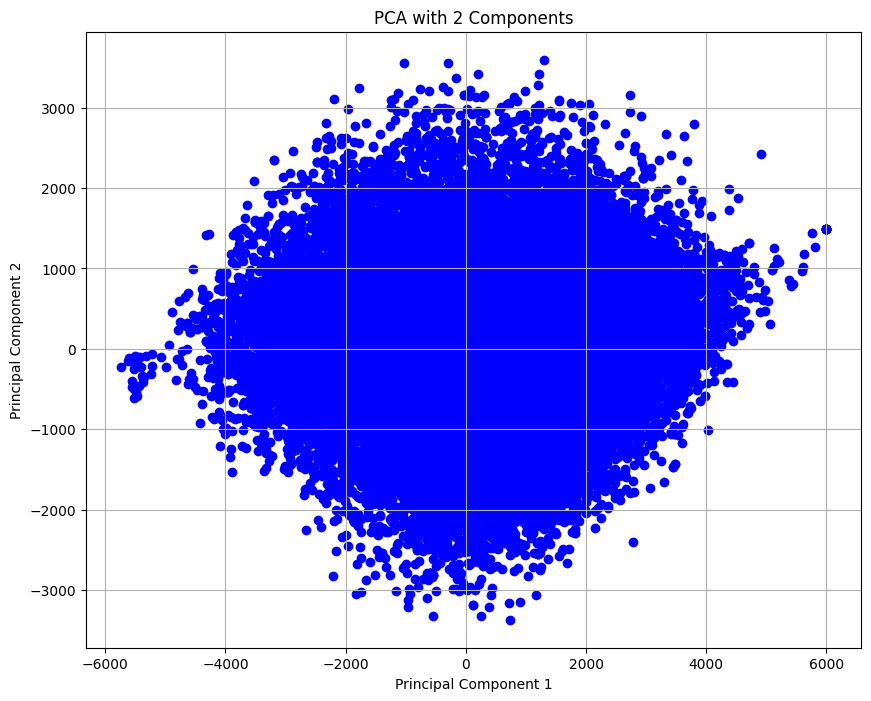

In [13]:
images_pca=pca.transform(images)

images_pca.shape
plt.figure(figsize=(10, 8))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c="blue", marker='o')
plt.title("PCA with 2 Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

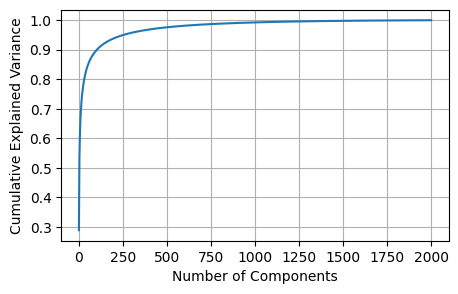

Top Cumulative Explained Variance:  0.9995519660539262


In [14]:
# Perform PCA
n_components = 2000
pca = PCA(n_components=n_components)
pca.fit(images)

# Plot cumulative explained variance
plt.figure(figsize=(5, 3))
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_sum)
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Print top cumulative explained variance
print("Top Cumulative Explained Variance: ", cumulative_sum[n_components-1])

*The core of PCA is the choice of the number of components k, which is investigated by cumulative explained variance ratio and evaluate it we can preserve the information of original data. The variance ratio is obtained by the singular values vector S as shown in the equation below:$$\frac{\displaystyle \sum_{i=1}^{k}S_{i}}{\displaystyle \sum_{i=1}^{n}S_{i}}$$Where k is the number of components (k-dimensions) and n is the number of features. The choice of k is done by selection of the smallest values of k, which has a variance ratio higher than a specific threshold.*

# 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Original Data

In [16]:
y = df["emotion"]
# X = data.drop(["emotion"], axis=1)
X = df['pixels'].apply(lambda x: np.fromstring(x, sep=' ')).tolist()

# Convert the list of lists to a numpy array
X = np.array(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [18]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [19]:
# Define parameter grids for both classifiers
param_grids = {
    'RandomForestClassifier': {
        'n_estimators': [10, 20],
        'max_depth': [10, 20]
    },
    'DecisionTreeClassifier': {
        'max_depth': [1, 5, 10],
        'min_samples_split': [2, 3]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [1, 3],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto']
    },
    'MLPClassifier': {
        'hidden_layer_sizes': [(20,), (30,)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'max_iter': [50, 100]
    }
}

# Initialize classifiers
classifiers = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'MLPClassifier': MLPClassifier()
}

# Function to perform GridSearchCV and return the best estimator
def perform_grid_search(clf, param_grid, X_train, y_train):
    grid_search = GridSearchCV(clf, param_grid, cv=2, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

# Dictionary to store metrics for plotting
metrics = {
    'Classifier': [],
    'Accuracy': [],
    'F1 Score': [],
    'Recall': [],
    'Precision': []
}
confusion_matrices = []

# Perform hyperparameter tuning, training, and evaluation for each classifier
for clf_name, clf in classifiers.items():
    print(f"Performing grid search for {clf_name}")
    best_estimator, best_params, best_score = perform_grid_search(clf, param_grids[clf_name], X_train, y_train)
    print(f"\tBest parameters for {clf_name}: {best_params}")
    print(f"\tBest cross-validation score for {clf_name}: {best_score}")
    
    # Train the best estimator on the full training set
    best_estimator.fit(X_train, y_train)
    
    # Test the best estimator on the test set
    y_pred = best_estimator.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    
    
    # Print metrics
    print(f"\tTest set accuracy for {clf_name}: {test_accuracy}")
    
    print(f"\tModel {clf_name}")
    print(classification_report(y_test, y_pred))
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Append confusion matrix to list
    confusion_matrices.append((clf_name, cm))
    
    # Store metrics for plotting
    metrics['Classifier'].append(clf_name)
    metrics['Accuracy'].append(test_accuracy)
    metrics['F1 Score'].append(f1)
    metrics['Recall'].append(recall)
    metrics['Precision'].append(precision)

Performing grid search for RandomForestClassifier
	Best parameters for RandomForestClassifier: {'max_depth': 20, 'n_estimators': 20}
	Best cross-validation score for RandomForestClassifier: 0.5032669048275662
	Test set accuracy for RandomForestClassifier: 0.603789356366676
	Model RandomForestClassifier
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       475
           1       0.99      1.00      1.00       545
           2       0.63      0.59      0.61       523
           3       0.45      0.43      0.44       543
           4       0.34      0.32      0.33       508
           5       0.76      0.84      0.80       514
           6       0.41      0.40      0.40       481

    accuracy                           0.60      3589
   macro avg       0.59      0.60      0.60      3589
weighted avg       0.60      0.60      0.60      3589

Performing grid search for DecisionTreeClassifier
	Best parameters for DecisionTreeClassifier: {'ma

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

	Best parameters for MLPClassifier: {'activation': 'relu', 'hidden_layer_sizes': (30,), 'max_iter': 100, 'solver': 'adam'}
	Best cross-validation score for MLPClassifier: 0.47920576047216884
	Test set accuracy for MLPClassifier: 0.5338534410699359
	Model MLPClassifier
              precision    recall  f1-score   support

           0       0.41      0.47      0.44       475
           1       0.93      0.99      0.96       545
           2       0.43      0.50      0.46       523
           3       0.50      0.44      0.47       543
           4       0.29      0.23      0.25       508
           5       0.71      0.76      0.73       514
           6       0.35      0.31      0.33       481

    accuracy                           0.53      3589
   macro avg       0.52      0.53      0.52      3589
weighted avg       0.52      0.53      0.53      3589



/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## Transformed data

In [20]:
y = df["emotion"]
X = df['pixels'].apply(lambda x: np.fromstring(x, sep=' ')).tolist()

# Convert the list of lists to a numpy array
X = np.array(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [22]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

**Based on the histogram of PCA, we chose the optimal number of principal components to be 100 to keep 90% of the information**

In [23]:
# Apply PCA
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_pca)
X_test = scaler.transform(X_test_pca)

In [25]:
# Define parameter grids for both classifiers
param_grids = {
    'RandomForestClassifier': {
        'n_estimators': [10, 20],
        'max_depth': [10, 20]
    },
    'DecisionTreeClassifier': {
        'max_depth': [1, 5, 10],
        'min_samples_split': [2, 3]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [1, 3],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto']
    },
    'MLPClassifier': {
        'hidden_layer_sizes': [(20,), (30,)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'max_iter': [50, 100]
    }

}

# Initialize classifiers
classifiers = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'MLPClassifier': MLPClassifier()

}

# Function to perform GridSearchCV and return the best estimator
def perform_grid_search(clf, param_grid, X_train, y_train):
    grid_search = GridSearchCV(clf, param_grid, cv=2, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

# Dictionary to store metrics for plotting
metrics_pca = {
    'Classifier': [],
    'Accuracy': [],
    'F1 Score': [],
    'Recall': [],
    'Precision': []
}

confusion_matrices_pca = []

# Perform hyperparameter tuning, training, and evaluation for each classifier
for clf_name, clf in classifiers.items():
    print(f"Performing grid search for {clf_name}")
    best_estimator, best_params, best_score = perform_grid_search(clf, param_grids[clf_name], X_train, y_train)
    print(f"\tBest parameters for {clf_name}: {best_params}")
    print(f"\tBest cross-validation score for {clf_name}: {best_score}")
    
    # Train the best estimator on the full training set
    best_estimator.fit(X_train, y_train)
    
    # Test the best estimator on the test set
    y_pred = best_estimator.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    
    
    # Print metrics
    print(f"\tTest set accuracy for {clf_name}: {test_accuracy}")
    
    print(f"\tModel {clf_name}")
    print(classification_report(y_test, y_pred))
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Append confusion matrix to list
    confusion_matrices_pca.append((clf_name, cm))
    
    # Store metrics for plotting
    metrics_pca['Classifier'].append(clf_name)
    metrics_pca['Accuracy'].append(test_accuracy)
    metrics_pca['F1 Score'].append(f1)
    metrics_pca['Recall'].append(recall)
    metrics_pca['Precision'].append(precision)

Performing grid search for RandomForestClassifier
	Best parameters for RandomForestClassifier: {'max_depth': 20, 'n_estimators': 20}
	Best cross-validation score for RandomForestClassifier: 0.4748086530898522
	Test set accuracy for RandomForestClassifier: 0.5795486207857342
	Model RandomForestClassifier
              precision    recall  f1-score   support

           0       0.55      0.61      0.58       475
           1       0.99      1.00      1.00       545
           2       0.62      0.59      0.61       523
           3       0.40      0.39      0.40       543
           4       0.34      0.30      0.32       508
           5       0.73      0.81      0.77       514
           6       0.32      0.34      0.33       481

    accuracy                           0.58      3589
   macro avg       0.57      0.58      0.57      3589
weighted avg       0.57      0.58      0.58      3589

Performing grid search for DecisionTreeClassifier
	Best parameters for DecisionTreeClassifier: {'m

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

	Best parameters for MLPClassifier: {'activation': 'relu', 'hidden_layer_sizes': (30,), 'max_iter': 100, 'solver': 'adam'}
	Best cross-validation score for MLPClassifier: 0.44025018930843407
	Test set accuracy for MLPClassifier: 0.4667038172192811
	Model MLPClassifier
              precision    recall  f1-score   support

           0       0.29      0.33      0.31       475
           1       0.91      1.00      0.95       545
           2       0.30      0.19      0.23       523
           3       0.45      0.51      0.48       543
           4       0.30      0.26      0.28       508
           5       0.51      0.65      0.57       514
           6       0.33      0.27      0.30       481

    accuracy                           0.47      3589
   macro avg       0.44      0.46      0.45      3589
weighted avg       0.45      0.47      0.45      3589



/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


# 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



**Original Data**

In [26]:
best_accuracy_index = metrics['Accuracy'].index(max(metrics['Accuracy']))
best_f1_index = metrics['F1 Score'].index(max(metrics['F1 Score']))
best_recall_index = metrics['Recall'].index(max(metrics['Recall']))
best_precision_index = metrics['Precision'].index(max(metrics['Precision']))

print("Best Model without PCA:")
print("Model:", metrics['Classifier'][best_accuracy_index])
print("Accuracy:", metrics['Accuracy'][best_accuracy_index])
print("F1 Score:", metrics['F1 Score'][best_accuracy_index])
print("Recall:", metrics['Recall'][best_precision_index])
print("Precision:", metrics['Precision'][best_precision_index])

Best Model without PCA:
Model: KNeighborsClassifier
Accuracy: 0.6054611312343271
F1 Score: 0.5989569214485998
Recall: 0.603789356366676
Precision: 0.5987535530005629


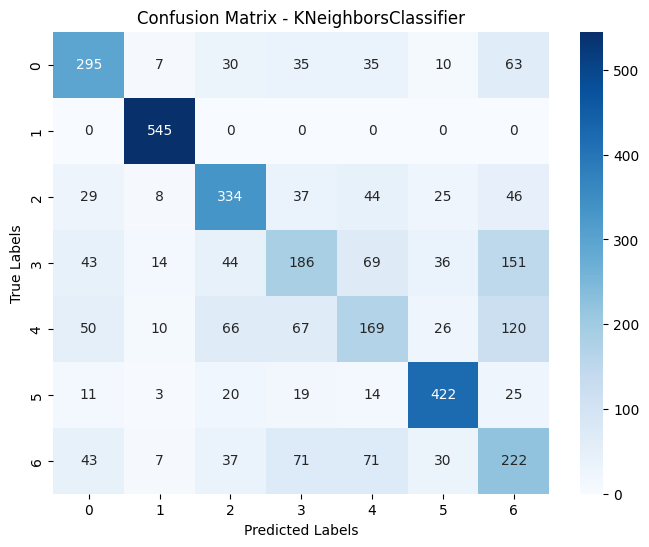

In [29]:
best_index = best_accuracy_index

best_clf_name = metrics['Classifier'][best_index]

# Find the confusion matrix of the best model
best_cm = confusion_matrices[best_index][1]

# Plotting the confusion matrix of the best model
plt.figure(figsize=(8, 6))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_clf_name}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**PCA data**

In [30]:
best_accuracy_index = metrics_pca['Accuracy'].index(max(metrics_pca['Accuracy']))
best_f1_index = metrics_pca['F1 Score'].index(max(metrics_pca['F1 Score']))
best_recall_index = metrics_pca['Recall'].index(max(metrics_pca['Recall']))
best_precision_index = metrics_pca['Precision'].index(max(metrics_pca['Precision']))

print("Best Model with PCA:")
print("Model:", metrics_pca['Classifier'][best_accuracy_index])
print("Accuracy:", metrics_pca['Accuracy'][best_accuracy_index])
print("F1 Score:", metrics_pca['F1 Score'][best_accuracy_index])
print("Recall:", metrics_pca['Recall'][best_precision_index])
print("Precision:", metrics_pca['Precision'][best_precision_index])

Best Model with PCA:
Model: KNeighborsClassifier
Accuracy: 0.5982167734745054
F1 Score: 0.5929680309375535
Recall: 0.5982167734745054
Precision: 0.5935852821277541


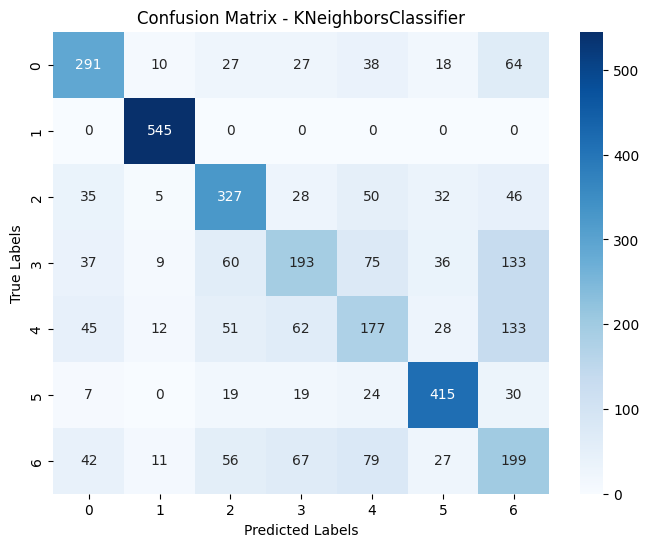

In [31]:
best_index = best_accuracy_index
best_clf_name = metrics_pca['Classifier'][best_index]

# Find the confusion matrix of the best model
best_cm = confusion_matrices_pca[best_index][1]

# Plotting the confusion matrix of the best model
plt.figure(figsize=(8, 6))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_clf_name}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

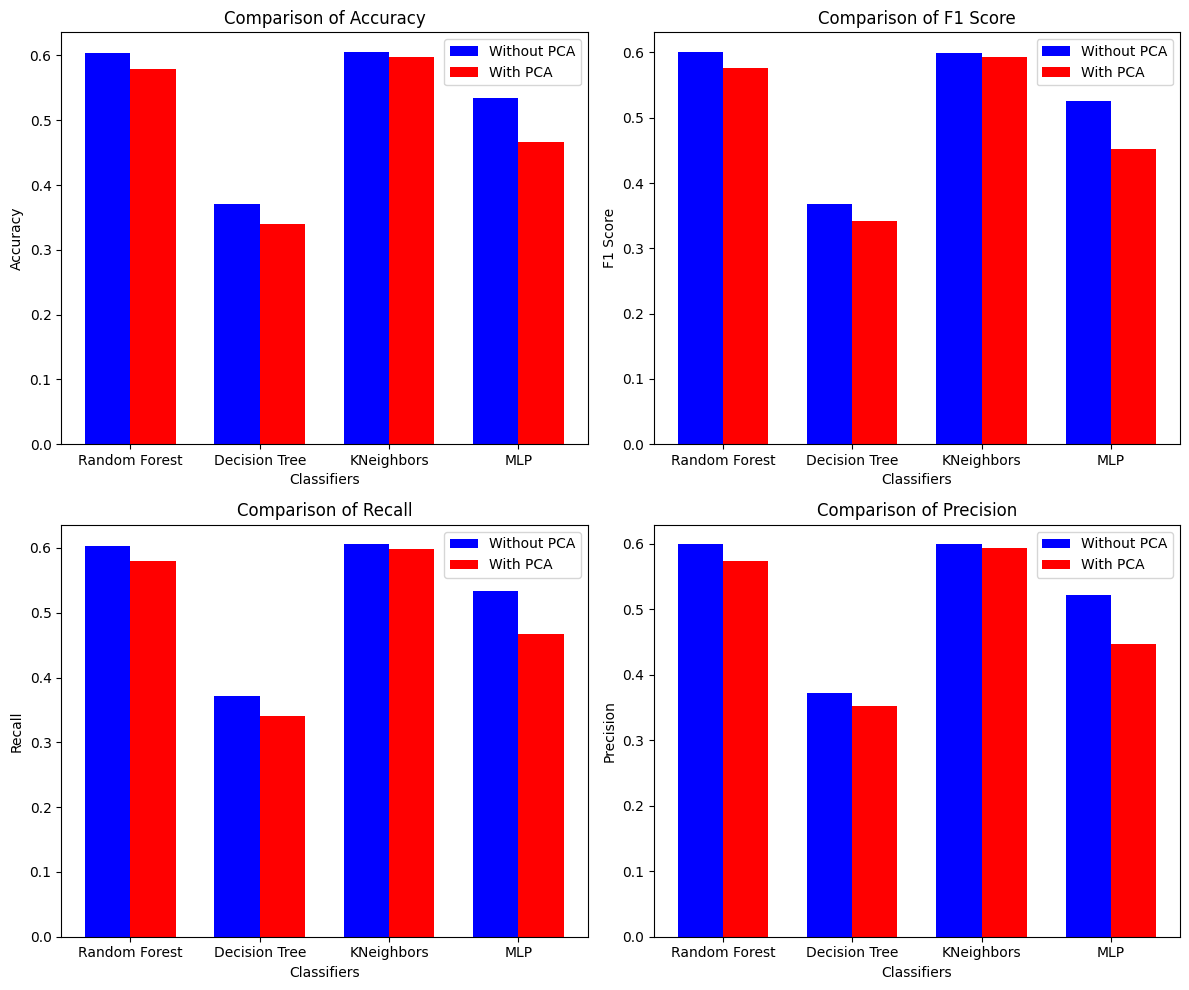

In [32]:
metric_names = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
classifiers = ['Random Forest', 'Decision Tree', 'KNeighbors', 'MLP']

# Number of classifiers
n_classifiers = len(classifiers)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot each metric
for i, metric in enumerate(metric_names):
    # Data for PCA and non-PCA
    pca_values = metrics_pca[metric]
    non_pca_values = metrics[metric]

    # Bar positions
    bar_width = 0.35
    index = np.arange(n_classifiers)

    # Create bar chart
    axs[i].bar(index, non_pca_values, bar_width, label='Without PCA', color='b')
    axs[i].bar(index + bar_width, pca_values, bar_width, label='With PCA', color='r')

    # Set titles and labels
    axs[i].set_title(f'Comparison of {metric}')
    axs[i].set_xlabel('Classifiers')
    axs[i].set_ylabel(metric)
    axs[i].set_xticks(index + bar_width / 2)
    axs[i].set_xticklabels(classifiers)
    axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()